In [2]:
import snowflake.connector
from datetime import datetime

# Set up your Snowflake connection parameters
account = 'maxdome.eu-west-1'
user = 'GAURAV_DANI'
role = 'ANALYST'
warehouse = 'BI_INTERN'
database = 'PLAYGROUND'
schema = 'HIGHTOUCH_TEST'
authenticator = 'externalbrowser'  # Okta domain for SSO

In [3]:
query ="""with check_for_for_you as (
select * , ROW_NUMBER() OVER (
                PARTITION BY event_src.session_installation_id, event_src.session_instance_id
                ORDER BY event_src.ingestion_ntz
            ) AS screen_index  from joyn_snow.im_ch.screen_views_f event_src  
)
select base_date,count(*) from check_for_for_you where screen_index=1 and screen_name = 'For You'
group by 1
order by 1 asc"""

In [4]:
import snowflake.connector
import duckdb
import pandas as pd

# Connect to Snowflake
ctx = snowflake.connector.connect(
    user=user,
    account=account,
    warehouse=warehouse,
    database=database,
    schema=schema,
    authenticator = authenticator
)

# Execute a SQL query and fetch the data
cursor = ctx.cursor()
cursor.execute(query)
data = cursor.fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data,columns = ['Date','Screen Views'])

# Create a DuckDB connection and load the DataFrame
con = duckdb.connect()
con.register("screen_views", df)

df

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://7-tv.okta.com/app/snowflake/exk9hpga3RHKsTbxU356/sso/saml?SAMLRequest=lZJfb9owFMW%2FSuQ9J05CacECKgpDZYMWQZjY3tzkAl4cO%2FN1CP32dfgzdQ%2BttLfIOce%2F43tu7%2F5YSO8ABoVWfRIFIfFApToTatcn62Tid4iHlquMS62gT14Byf2gh7yQJRtWdq%2BW8KcCtJ67SCFrfvRJZRTTHAUyxQtAZlO2Gs5nLA5CxhHBWIcjF0uGwrH21paM0rqug7oVaLOjcRiGNOxSp2okX8g7RPk5ozTa6lTLq%2BXo3vQBIqLhTYNwCkdYXIwPQp1H8Bnl5SxC9pgkC3%2FxvEqIN7y%2BbqQVVgWYFZiDSGG9nJ0DoEswH27Gz%2FOvAVR%2B7UbnRwEqXW8lzyHVRVlZd2vgvugWMir1TrhZTcd9UuYiS%2FdP8LPUyXqk84fsm22v8u1k0446INe3vE6hu1kKPvk9y3Yp8X5cm42bZqeIFUxV06d1R2F844cdP46SqMviFmt1g7tO%2FIt4YxdKKG5PzmvoO98eAp1bfkrGy5L%2BDU3hmHf35Y63lo%2FfMXk5rlvtW4qoadMVOa8LO9HN4H%2BH0KPv3ZfNe3JlTMcLLUX66k20Kbj9uKsoiE4nIvO3JymDggs5zDIDiK4zKXU9MsCtW3BrKiB0cKb%2Bu%2BKDNw%3D%3D&RelayState=6

,Date,Screen Views
0,2024-05-03,1
1,2024-05-08,1
2,2024-05-16,3
3,2024-05-17,8
4,2024-05-19,1
...,...,...
90,2024-08-17,10155
91,2024-08-18,10665
92,2024-08-19,8432
93,2024-08-20,8314


In [5]:
# Perform SQL-like operations using DuckDB
count_oF_screen_views = con.execute("select * from screen_views").fetch_df()



In [6]:
count_oF_screen_views

,Date,Screen Views
0,2024-05-03,1
1,2024-05-08,1
2,2024-05-16,3
3,2024-05-17,8
4,2024-05-19,1
...,...,...
90,2024-08-17,10155
91,2024-08-18,10665
92,2024-08-19,8432
93,2024-08-20,8314


<Figure size 10000x6000 with 0 Axes>

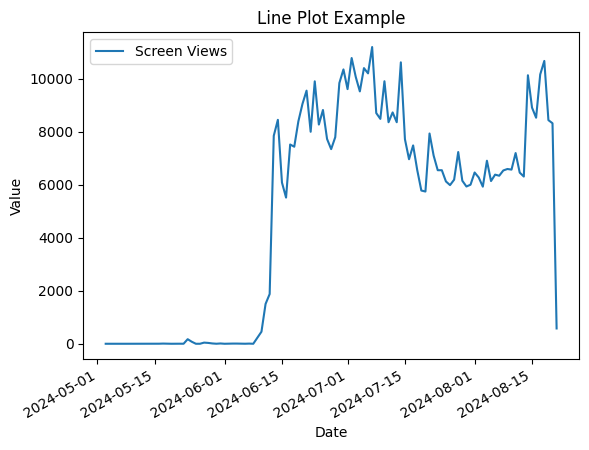

In [8]:
import matplotlib.pyplot as plt

count_oF_screen_views['Date'] = pd.to_datetime(count_oF_screen_views['Date'])

# Set the 'Date' column as the index
# count_oF_screen_views.set_index('Date', inplace=True)

plt.figure(figsize=(100, 60))
count_oF_screen_views.plot(kind='line', x = 'Date')
plt.title('Line Plot Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

